# Candidate Test 2022 Analysis

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- PCA or some other dimensionality reduction technique to plot responses in two dimensions, thereby visualizing the "political landscape". The colors of the plotted points should match the political party colors (see below).
- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



# Solution

In [317]:
# Importing libraries

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.gridspec as grid_spec

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.cluster import KMeans, DBSCAN
import collections
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [318]:
# Importing dataset

allData = pd.read_excel('alldata.xlsx')
drData = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2Data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electedData = pd.read_excel('electeddata.xlsx')

In [319]:
allData.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


In [320]:
allData.shape

(867, 53)

In [321]:
allData.columns

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
       'alder'],
      dtype='object')

In [322]:
allData["parti"].unique()

array(['Moderaterne', 'Socialistisk Folkeparti', 'Alternativet',
       'Løsgænger', 'Enhedslisten', 'Danmarksdemokraterne', 'Venstre',
       'Frie Grønne, Danmarks Nye Venstrefløjsparti', 'Dansk Folkeparti',
       'Kristendemokraterne', 'Liberal Alliance', 'Nye Borgerlige',
       'Det Konservative Folkeparti', 'Radikale Venstre',
       'Socialdemokratiet'], dtype=object)

In [323]:
# removing Løsgænger (independent) candidates as their views might be vastly different even within them.

allData = allData[~(allData["parti"] == "Løsgænger")]
allData = allData.reset_index(drop=True)

In [324]:
##Explore missing values by finding the precentage of missing values for each column - print as a dataframe

allData.isnull().sum().sum()

0

In [325]:
allData

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,2,1,-2,-2,-1,-1,-1,1,1,-1,...,-1,0,1,1,-1,2,2,-2,Københavns Storkreds,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,1,1,1,-2,2,-1,1,-2,1,1,...,1,2,-1,2,1,-2,0,0,Københavns Omegns Storkreds,33
860,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,-1,0,-1,2,2,-2,0,0,Københavns Omegns Storkreds,45
861,1,1,1,-2,2,-1,1,-1,-1,1,...,-1,0,-1,2,2,-2,0,1,Københavns Omegns Storkreds,52
862,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,2,1,-2,1,0,Københavns Omegns Storkreds,44


In [326]:
# Define a color mapping for each party
party_colors = {
    "Socialdemokratiet": "#b32722",
    "Radikale Venstre": "#713280",
    "Det Konservative Folkeparti": "#9eba27",
    "Nye Borgerlige": "#054f5c",
    "Socialistisk Folkeparti": "#dd0878",
    "Liberal Alliance": "#21c6cf",
    "Kristendemokraterne": "#bababa",
    "Moderaterne": "#6c39e5",
    "Dansk Folkeparti": "#f3cd41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00e66a",
    "Venstre": "#006697",
    "Alternativet": "#2a8f39",
    "Enhedslisten": "#ed8019",
    "Danmarksdemokraterne": "#8ac3ff"
}

## **Visualizing Political Landscape**

In [327]:
allData_numeric = allData.select_dtypes("number")

## PCA

In [328]:
scaler = StandardScaler()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(allData_numeric)

In [329]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for PC1 and PC2
print(f"Variance Explained by PC1: {explained_variance_ratio[0]:.2%}")
print(f"Variance Explained by PC2: {explained_variance_ratio[1]:.2%}")
print(f"Variance Explained by PC2: {explained_variance_ratio[2]:.2%}")

Variance Explained by PC1: 68.37%
Variance Explained by PC2: 14.48%
Variance Explained by PC2: 3.49%


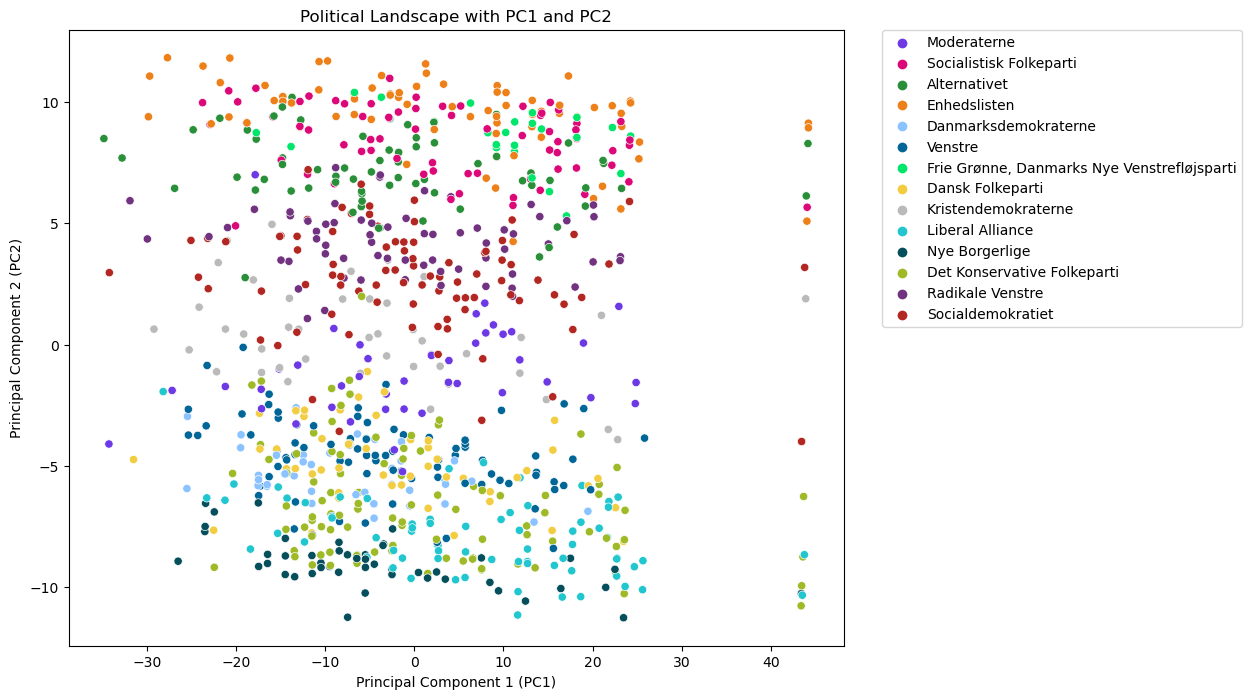

In [330]:
#Dataframe with the two principal components
allData_pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])
allData_pca_df['parti'] = allData['parti'] 

# Plot the reduced data with party colors
plt.figure(figsize=(10, 8))
sns.scatterplot(data=allData_pca_df, x="PC1", y="PC2", hue="parti", palette=party_colors)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Political Landscape with PC1 and PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()

## t-SNE

In [331]:
tsne = TSNE(n_components=2, init='pca', early_exaggeration=12)
X_tsne = tsne.fit_transform(scaler.fit_transform(allData_numeric))
rot = PCA(n_components=2)
X_tsne = rot.fit_transform(X_tsne)

In [332]:
# Dataframe with the two t-SNE components
allData_tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
allData_tsne_df['parti'] = allData['parti']

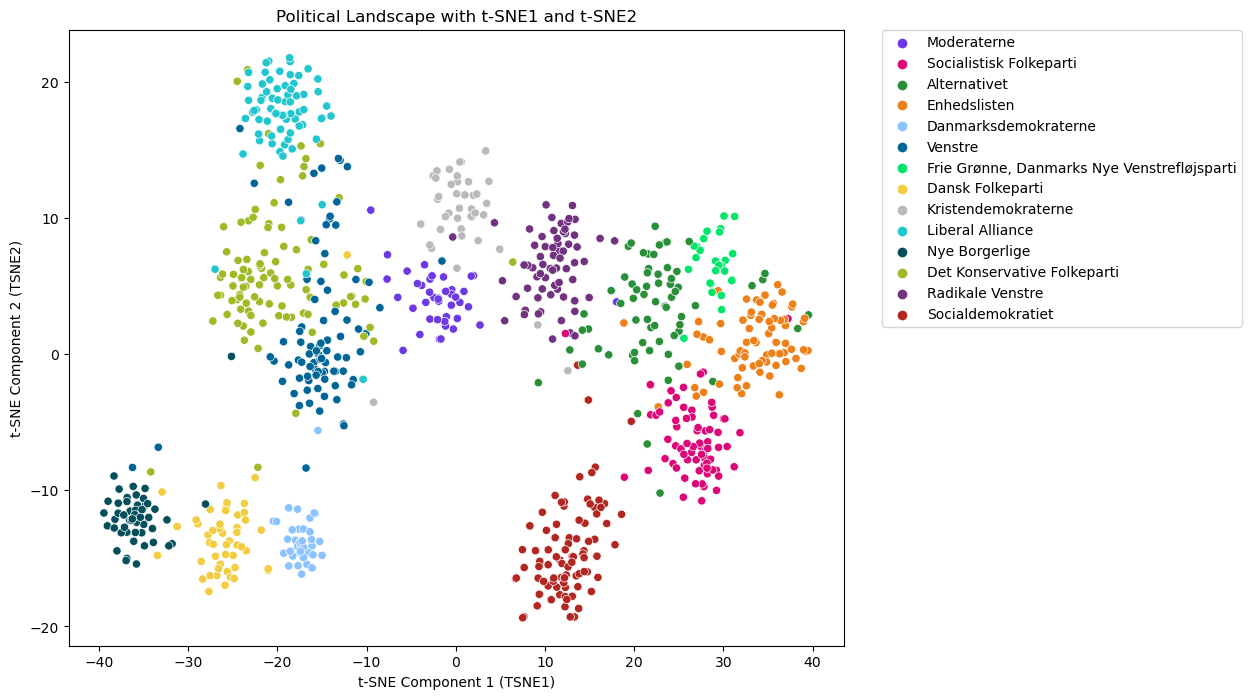

In [333]:
# Plot the reduced data with party colors
plt.figure(figsize=(10, 8))
sns.scatterplot(data=allData_tsne_df, x="TSNE1", y="TSNE2", hue="parti", palette=party_colors)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Political Landscape with t-SNE1 and t-SNE2')
plt.xlabel('t-SNE Component 1 (TSNE1)')
plt.ylabel('t-SNE Component 2 (TSNE2)')
plt.show()

## Age of candidates grouped by parties

In [334]:
# Calculate the average age for each party
ageData = allData.groupby('parti')['alder'].mean().to_frame()

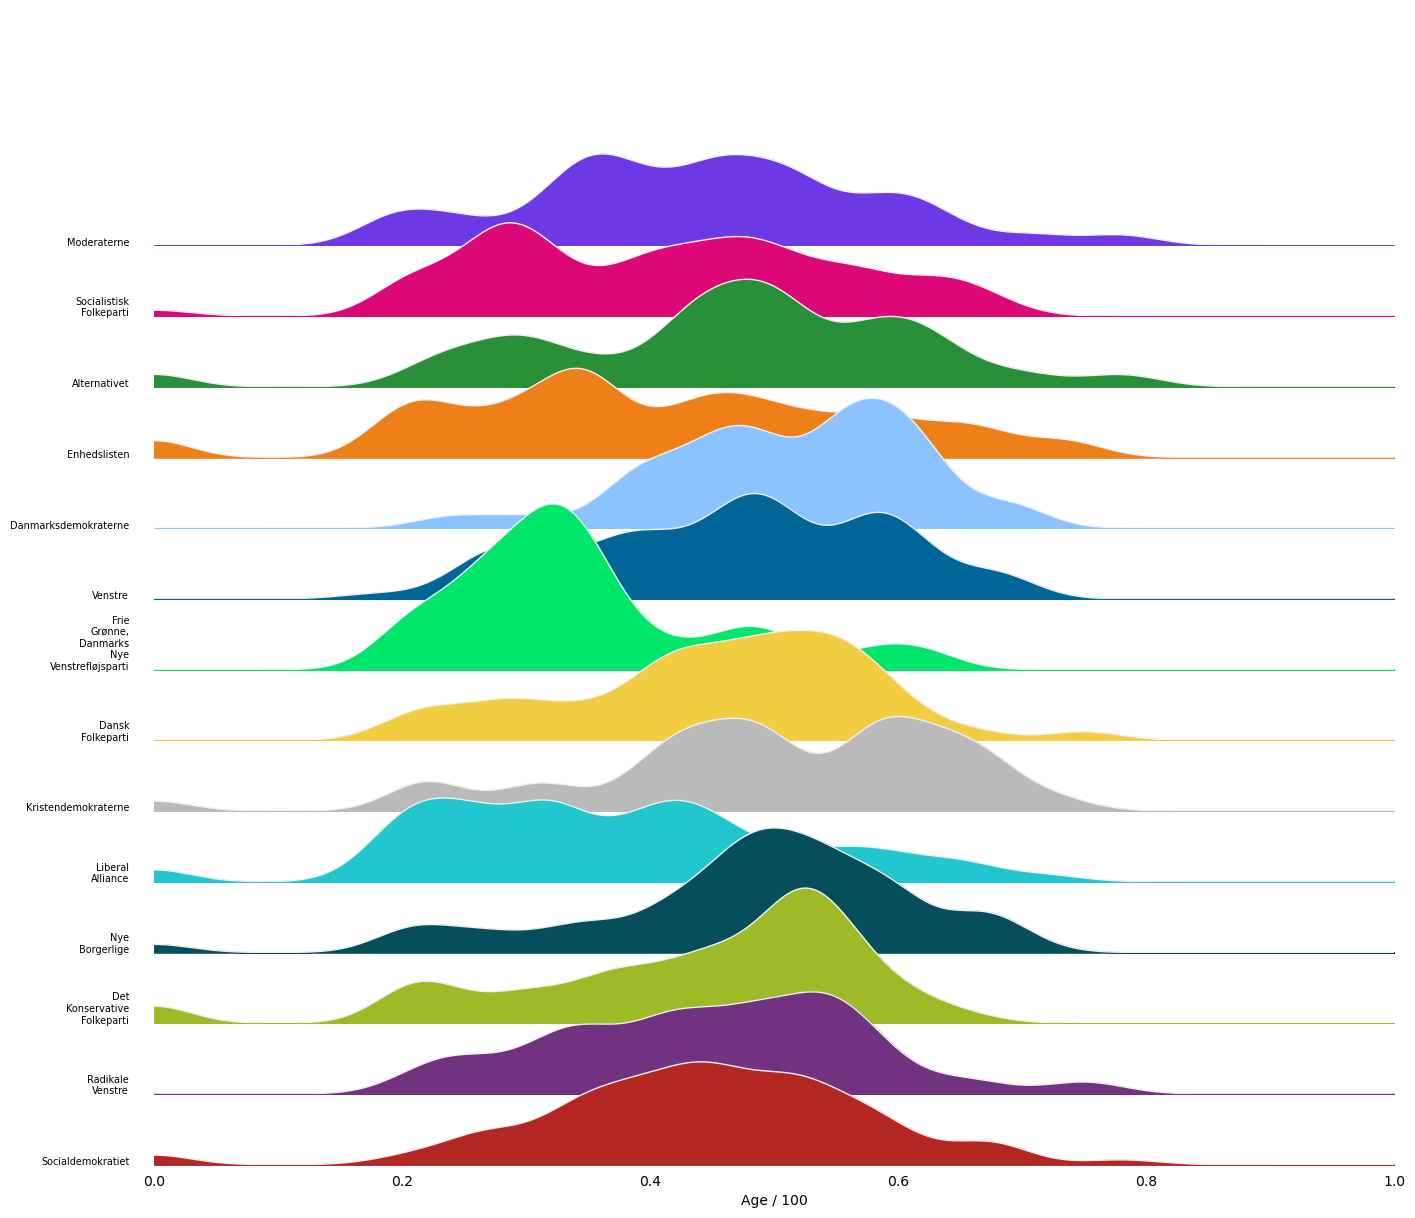

In [335]:
parties = allData["parti"].unique()

gs = grid_spec.GridSpec(len(parties),1)
fig = plt.figure(figsize=(16, 15))

i = 0

ax_objs = []
for party in parties:
    party = parties[i]
    x = np.array(allData[allData["parti"] == party]["alder"])/100
    x_d = np.linspace(0,1, 1000)

    kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    kde.fit(x[:, None])

    logprob = kde.score_samples(x_d[:, None])

    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    ax_objs[-1].plot(x_d, np.exp(logprob),color="#f0f0f0",lw=1)
    ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1, color=party_colors[party])


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0,1)
    ax_objs[-1].set_ylim(0,7.5)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])

    if i == len(parties)-1:
        ax_objs[-1].set_xlabel("Age / 100")
    else:
        ax_objs[-1].set_xticklabels([])
        
    for ax in ax_objs:
        ax.tick_params(left=False)
        ax.tick_params(bottom=False)
        ax.spines[["top","right","left","bottom"]].set_visible(False)
    
    adj_country = party.replace(" ","\n")
    ax_objs[-1].text(-0.02,0,adj_country,fontsize=7,ha="right")


    i += 1

gs.update(hspace=-0.7)

plt.show()

In [336]:
allData["greater_than_40"] = allData["alder"]>40

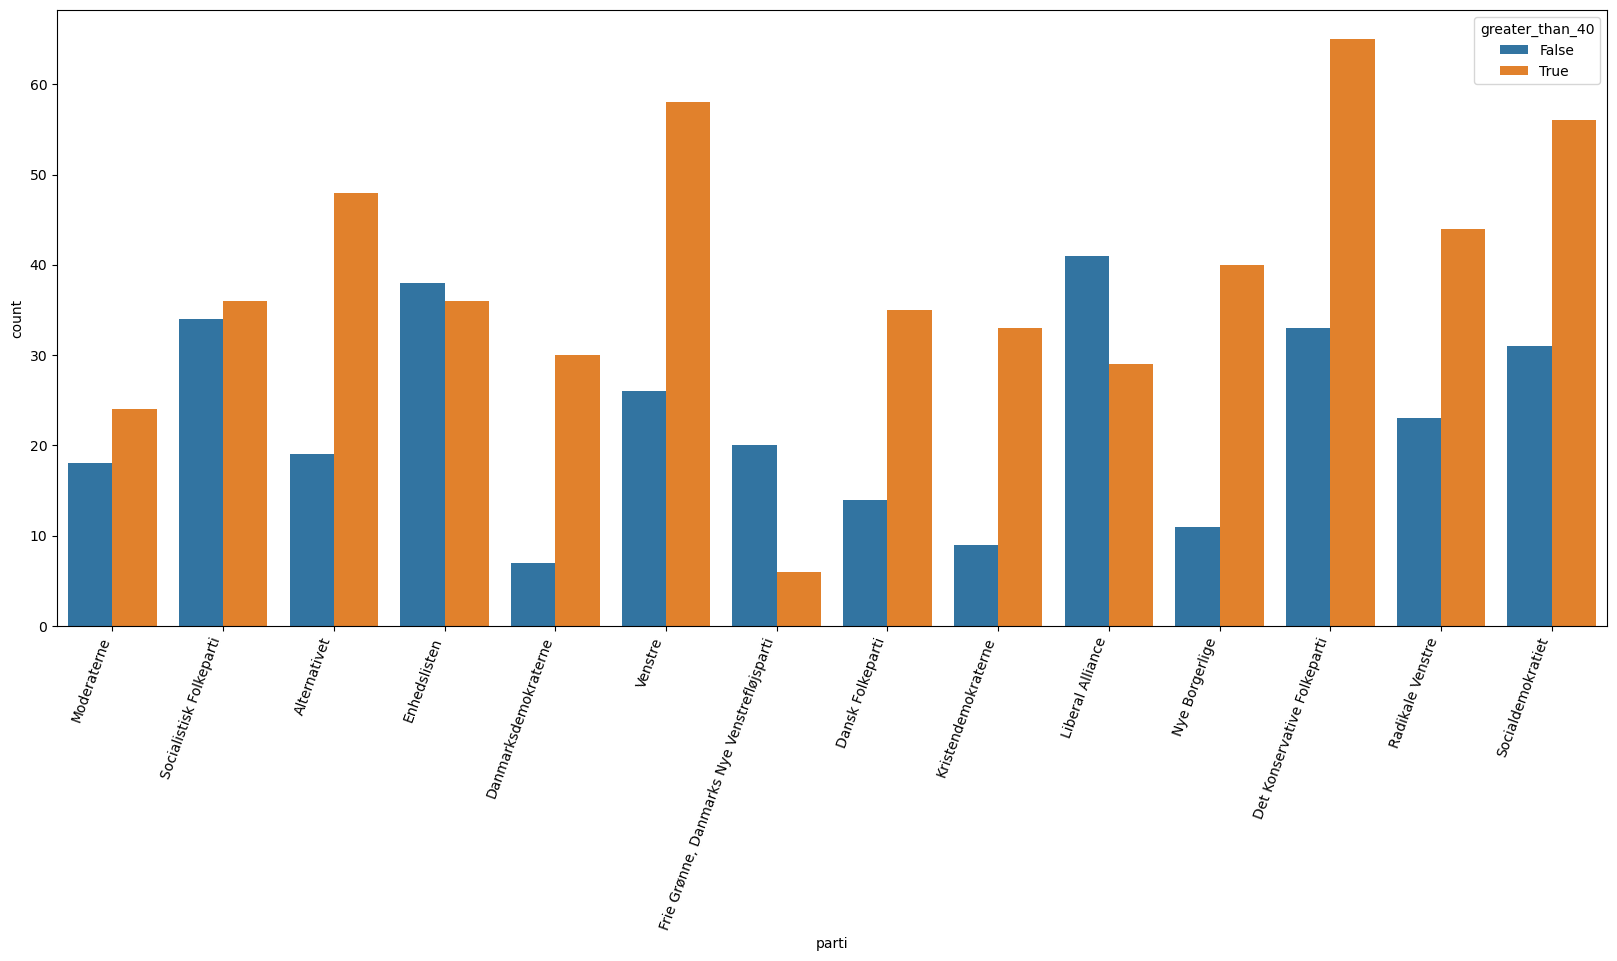

In [337]:
plt.figure(figsize=(20, 8))
sns.countplot(data=allData, x="parti", hue="greater_than_40")
plt.xticks(rotation=70, ha='right')
plt.show()

## An analysis/description of which questions are most crucial concerning their placement on the axes.


In [338]:
# First we need to find the questions that are most crucial for the placement on the axes
# We do this by looking at the correlation between the questions and the axes

# Get the loadings of the principal components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=allData_numeric.columns)
loadings_df

,PC1,PC2,PC3
530,0.140228,1.220989,-0.164883
531,0.145681,1.360577,0.233334
533,-0.203247,-0.874789,0.628909
534,0.003657,-0.282927,0.588542
535,-0.181907,-0.938781,0.086043
537,-0.005809,-1.327466,-0.322707
538,0.118792,0.898808,0.280029
540,-0.104099,-1.192752,-0.503929
541,0.196932,1.221606,-0.210255
543,-0.118268,-1.279079,0.009828


In [339]:
# Get the correlation between the questions and the axes
corr_df = allData_numeric.corrwith(allData_pca_df['PC1']).to_frame('PC1').join(allData_numeric.corrwith(allData_pca_df['PC2']).to_frame('PC2'))
corr_df


,PC1,PC2
530,0.098545,0.858047
531,0.090100,0.841480
533,-0.132983,-0.572366
534,0.002648,-0.204905
535,-0.134659,-0.694942
537,-0.003764,-0.860146
538,0.089062,0.673862
540,-0.068371,-0.783387
541,0.125643,0.779386
543,-0.077512,-0.838293


In [340]:
# Print the top positive and negative loadings for each principal component
for i in range(2):
    print(f"\nTop Loadings for PC{i + 1}:\n")
    top_positive = loadings_df.nlargest(5, f'PC{i + 1}')
    top_negative = loadings_df.nsmallest(5, f'PC{i + 1}')

    print(f"Top Positive Loadings:\n{top_positive}\n")
    print(f"Top Negative Loadings:\n{top_negative}\n")



Top Loadings for PC1:

Top Positive Loadings:
          PC1       PC2       PC3
544  0.278044  1.213485 -0.150311
561  0.242660  0.804129 -0.243334
541  0.196932  1.221606 -0.210255
6a   0.168659  1.210169 -0.760196
531  0.145681  1.360577  0.233334

Top Negative Loadings:
             PC1       PC2       PC3
alder -14.400118  0.243280 -0.074363
553    -0.230515 -0.091588  0.799314
533    -0.203247 -0.874789  0.628909
535    -0.181907 -0.938781  0.086043
555    -0.168263 -1.247904  0.797924


Top Loadings for PC2:

Top Positive Loadings:
          PC1       PC2       PC3
550  0.077239  1.362260 -0.025777
531  0.145681  1.360577  0.233334
3b   0.079313  1.354992 -0.457053
541  0.196932  1.221606 -0.210255
530  0.140228  1.220989 -0.164883

Top Negative Loadings:
          PC1       PC2       PC3
537 -0.005809 -1.327466 -0.322707
543 -0.118268 -1.279079  0.009828
555 -0.168263 -1.247904  0.797924
540 -0.104099 -1.192752 -0.503929
6b  -0.160549 -1.189215  0.775598



Top Positive Loadings: These are the questions that contribute the most positively to the position along the principal component. A higher positive loading indicates a stronger positive influence on the axis.

Top Negative Loadings: These are the questions that contribute the most negatively to the position along the principal component. A higher negative loading indicates a stronger negative influence on the axis.

## Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.

In [341]:
allData.head()

,530,531,533,534,535,537,538,540,541,543,...,9b,10a,10b,11a,11b,12a,12b,storkreds,alder,greater_than_40
0,-1,-2,1,-2,2,1,-2,1,1,2,...,0,1,-2,-2,1,1,1,Københavns Storkreds,78,True
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,-1,2,1,-2,0,0,Fyns Storkreds,64,True
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37,False
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28,False
4,2,1,-2,-2,-1,-1,-1,1,1,-1,...,0,1,1,-1,2,2,-2,Københavns Storkreds,48,True


In [342]:
#Grouping data  and taking the mean of each question
grouped_data = allData.drop(['navn', 'storkreds'], axis=1)
grouped_data.head()

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,alder,greater_than_40
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,78,True
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,64,True
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,37,False
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,28,False
4,2,1,-2,-2,-1,-1,-1,1,1,-1,...,-1,0,1,1,-1,2,2,-2,48,True


In [343]:
mean_data = grouped_data.groupby('parti').mean().reset_index()
mean_data.head()

,parti,530,531,533,534,535,537,538,540,541,...,9a,9b,10a,10b,11a,11b,12a,12b,alder,greater_than_40
0,Alternativet,1.880597,1.134328,-1.895522,-1.820896,-0.776119,-1.641791,-0.716418,0.283582,1.149254,...,-1.477612,0.164179,-0.149254,1.029851,0.164179,0.492537,0.492537,-0.671642,46.000000,0.716418
1,Danmarksdemokraterne,-0.837838,-1.378378,1.513514,-0.972973,1.756757,0.189189,-1.864865,1.054054,-1.918919,...,0.567568,-0.702703,0.918919,1.918919,-1.972973,1.891892,0.486486,0.297297,51.216216,0.810811
2,Dansk Folkeparti,-0.571429,-1.081633,1.551020,1.653061,1.551020,0.000000,-1.551020,0.734694,-1.448980,...,0.816327,-0.306122,0.918367,1.448980,-1.693878,1.795918,0.816327,-0.693878,45.530612,0.714286
3,Det Konservative Folkeparti,-0.836735,-1.877551,0.948980,-1.714286,1.816327,1.408163,-1.979592,1.663265,-1.255102,...,0.500000,-0.295918,1.469388,-1.612245,-1.806122,1.806122,0.765306,-0.295918,42.897959,0.663265
4,Enhedslisten,1.959459,1.864865,-1.918919,0.405405,-1.662162,-1.878378,0.418919,-1.797297,1.635135,...,-1.824324,0.283784,-1.040541,1.905405,0.702703,-1.162162,-0.554054,0.108108,40.513514,0.486486


In [344]:
selected_questions = ['544', '561', '541', '553', '533']

mean_data = pd.melt(mean_data, id_vars=["parti"], value_vars=selected_questions)
mean_data.head()

,parti,variable,value
0,Alternativet,544,1.328358
1,Danmarksdemokraterne,544,-1.783784
2,Dansk Folkeparti,544,-1.755102
3,Det Konservative Folkeparti,544,-1.612245
4,Enhedslisten,544,1.567568


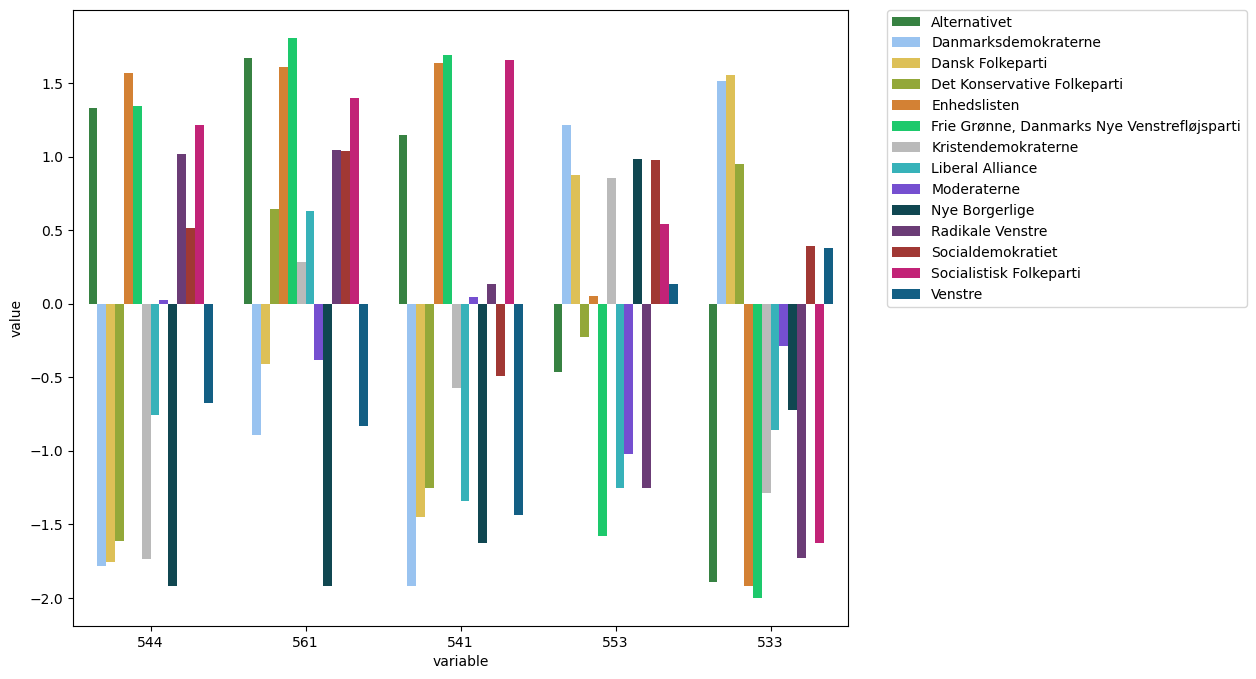

In [345]:
plt.figure(figsize=(10, 8))
sns.barplot(data=mean_data, x="variable", y="value", hue="parti", palette=party_colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.


In [346]:
#Saving candidates with the highest proportion of "strongly agree" or "strongly disagree" responses in a new dataframe
allData_questions = allData.drop(['storkreds', 'alder'], axis=1)


In [347]:
#Getting columns to count
columns_to_count = allData_questions.drop(['navn'], axis=1).columns

# Count the number of "strongly agree" and "strongly disagree" responses for each candidate
allData_questions['strong_response_count'] = allData_questions[columns_to_count].isin([2, -2]).sum(axis=1)
total_questions = 49
allData_questions["strong_response_percentage"] = (allData_questions['strong_response_count']/total_questions)*100
allData_questions.head()



,530,531,533,534,535,537,538,540,541,543,...,9b,10a,10b,11a,11b,12a,12b,greater_than_40,strong_response_count,strong_response_percentage
0,-1,-2,1,-2,2,1,-2,1,1,2,...,0,1,-2,-2,1,1,1,True,25,51.020408
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,-1,2,1,-2,0,0,True,25,51.020408
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-2,0,2,0,-1,1,-2,False,22,44.897959
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,2,2,-1,2,0,False,33,67.346939
4,2,1,-2,-2,-1,-1,-1,1,1,-1,...,0,1,1,-1,2,2,-2,True,16,32.653061


In [348]:
allData_questions[['navn', 'parti', 'strong_response_count', 'strong_response_percentage']]


,navn,parti,strong_response_count,strong_response_percentage
0,Lars Philipsen Prahm,Moderaterne,25,51.020408
1,Karsten Hønge,Socialistisk Folkeparti,25,51.020408
2,Martin Kelleher-Petersen,Alternativet,22,44.897959
3,Nicklas Gjedsig Larsen,Alternativet,33,67.346939
4,Jan Kristoffersen,Alternativet,16,32.653061
...,...,...,...,...
859,Maria Gudme,Socialdemokratiet,16,32.653061
860,Maria Durhuus,Socialdemokratiet,22,44.897959
861,Morten Bødskov,Socialdemokratiet,16,32.653061
862,Jeppe Bruus,Socialdemokratiet,4,8.163265


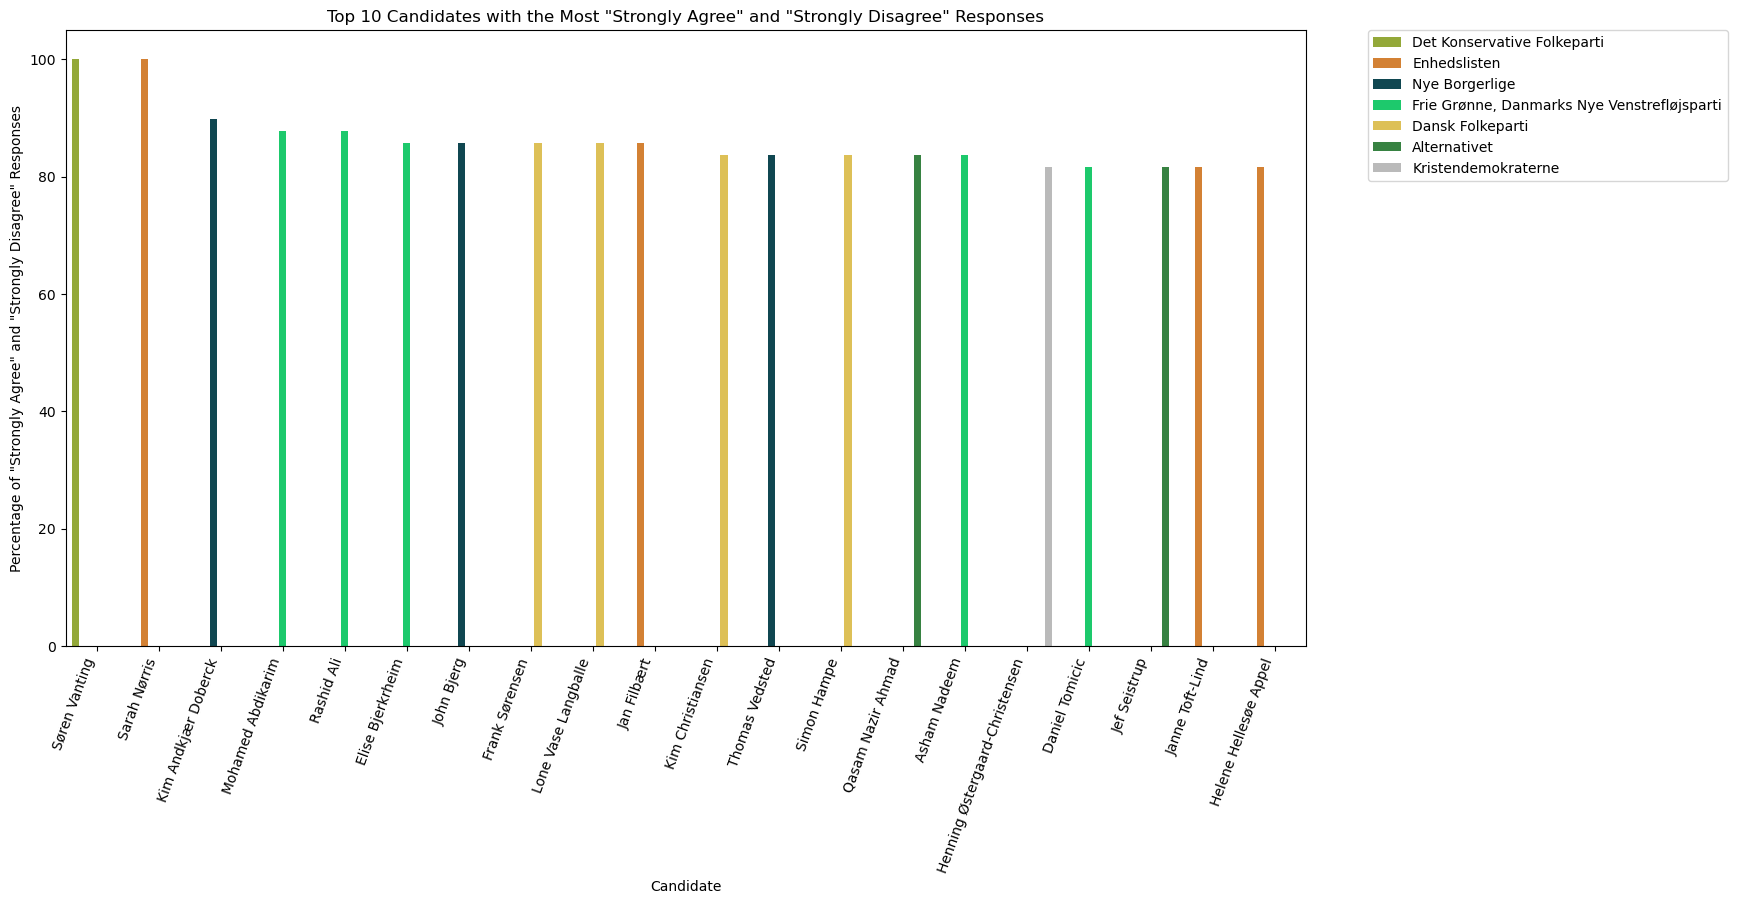

In [349]:
# Get the top 10 candidates with the most "strongly agree" and "strongly disagree" responses
top_candidates = allData_questions.nlargest(20, 'strong_response_percentage')

#Plotting the top 10 candidates with the most "strongly agree" and "strongly disagree" responses
plt.figure(figsize=(16, 8))
sns.barplot(data=top_candidates, x="navn", y="strong_response_percentage", palette=party_colors, hue="parti")
plt.title('Top 10 Candidates with the Most "Strongly Agree" and "Strongly Disagree" Responses')
plt.xlabel('Candidate')
plt.ylabel('Percentage of "Strongly Agree" and "Strongly Disagree" Responses')
plt.xticks(rotation=70, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

In [350]:
allData.columns

Index(['530', '531', '533', '534', '535', '537', '538', '540', '541', '543',
       '544', '545', '546', '547', '548', '550', '551', '552', '553', '555',
       '556', '557', '559', '561', '563', 'navn', 'parti', '1a', '1b', '2a',
       '2b', '3a', '3b', '4a', '4b', '5a', '5b', '6a', '6b', '7a', '7b', '8a',
       '8b', '9a', '9b', '10a', '10b', '11a', '11b', '12a', '12b', 'storkreds',
       'alder', 'greater_than_40'],
      dtype='object')

In [351]:
selected_questions

['544', '561', '541', '553', '533']

In [352]:
only_answers = allData[selected_questions].copy()

only_answers.loc[:, "parti"] = allData.loc[:, "parti"]

In [353]:
only_answers

,544,561,541,553,533,parti
0,-2,2,1,-2,1,Moderaterne
1,2,1,2,1,-1,Socialistisk Folkeparti
2,2,2,1,-1,-2,Alternativet
3,2,2,1,1,-2,Alternativet
4,1,2,1,-1,-2,Alternativet
...,...,...,...,...,...,...
859,2,2,1,1,1,Socialdemokratiet
860,1,-1,-2,1,-2,Socialdemokratiet
861,1,1,-1,2,1,Socialdemokratiet
862,-1,1,-1,-1,1,Socialdemokratiet


In [354]:
# Calculate mean scores per party for each question

party_means = only_answers.groupby(['parti']).mean()
party_means

,544,561,541,553,533
parti,,,,,
Alternativet,1.328358,1.671642,1.149254,-0.462687,-1.895522
Danmarksdemokraterne,-1.783784,-0.891892,-1.918919,1.216216,1.513514
Dansk Folkeparti,-1.755102,-0.408163,-1.448980,0.877551,1.551020
Det Konservative Folkeparti,-1.612245,0.642857,-1.255102,-0.224490,0.948980
Enhedslisten,1.567568,1.608108,1.635135,0.054054,-1.918919
"Frie Grønne, Danmarks Nye Venstrefløjsparti",1.346154,1.807692,1.692308,-1.576923,-2.000000
Kristendemokraterne,-1.738095,0.285714,-0.571429,0.857143,-1.285714
Liberal Alliance,-0.757143,0.628571,-1.342857,-1.257143,-0.857143
Moderaterne,0.023810,-0.380952,0.047619,-1.023810,-0.285714


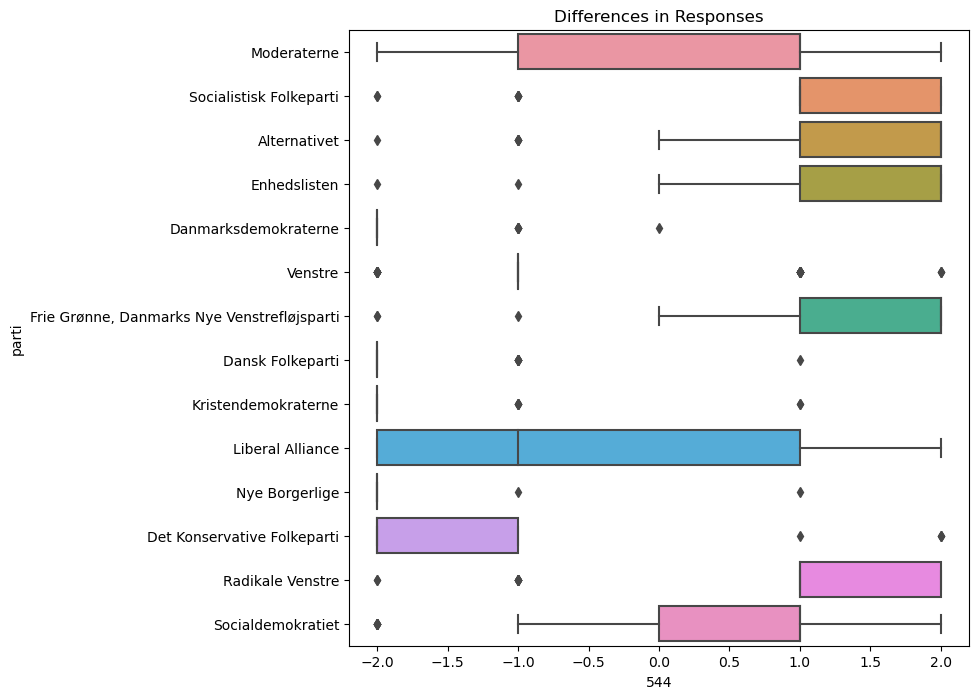

In [357]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=only_answers, y='parti', x='544')  # We can replicate for Q2 to Q49
plt.title('Differences in Responses')
plt.show()

In [358]:
# Calculate internal disagreements per party
party_disagreements = only_answers.groupby('parti').std()

# Print table of internal disagreements
print('Internal Disagreements per Party:')
party_disagreements

Internal Disagreements per Party:


,544,561,541,553,533
parti,,,,,
Alternativet,0.990685,0.587446,1.033584,1.210164,0.308188
Danmarksdemokraterne,0.479301,0.965625,0.363500,0.629600,0.901284
Dansk Folkeparti,0.560157,1.427678,0.708908,1.111168,0.867497
Det Konservative Folkeparti,0.820267,1.278288,1.028573,1.351064,1.271191
Enhedslisten,0.723028,0.518627,0.538245,1.145472,0.274823
"Frie Grønne, Danmarks Nye Venstrefløjsparti",1.231010,0.401918,0.884047,0.856648,0.000000
Kristendemokraterne,0.700506,1.293242,1.309307,1.072299,1.110608
Liberal Alliance,1.232832,1.079069,0.882777,0.845889,1.145700
Moderaterne,1.199351,1.228769,1.208756,0.811145,1.293242


In [359]:
selected_questions 

['544', '561', '541', '553', '533']

In [360]:
# Identify party with most internal disagreements
for q in selected_questions:
    most_disagreements_party = party_disagreements.idxmax().loc[q]
    print("The party with the most internal disagreements on question", q , "is :", most_disagreements_party)


The party with the most internal disagreements on question 544 is : Liberal Alliance
The party with the most internal disagreements on question 561 is : Dansk Folkeparti
The party with the most internal disagreements on question 541 is : Kristendemokraterne
The party with the most internal disagreements on question 553 is : Det Konservative Folkeparti
The party with the most internal disagreements on question 533 is : Moderaterne


### An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

In [361]:
df = allData.drop(columns=['navn','storkreds', 'alder', 'greater_than_40'])

In [362]:
df_no_party = df.drop(columns=["parti"])

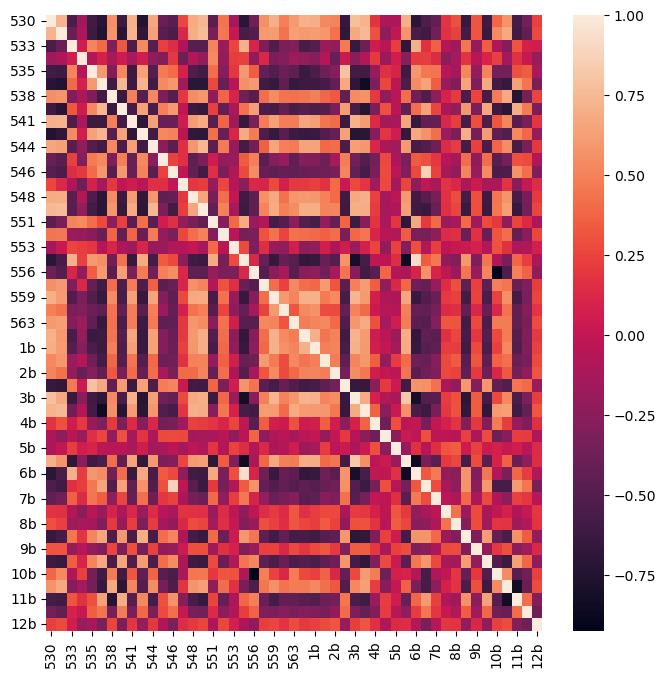

In [363]:
plt.figure(figsize=(8,8))
sns.heatmap(df_no_party.corr())
plt.show()

In [364]:
correlation_matrix = df_no_party.corr()

# Set your correlation threshold
threshold = 0.8

# Find correlated pairs
correlated_pairs = []

# Iterate through the upper triangle of the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


# Print the correlated pairs
print("Questions with correlation greater than ", threshold, ":")
print(*correlated_pairs, sep="\n")

Questions with correlation greater than  0.8 :
('537', '4a')
('546', '7a')
('555', '3b')
('555', '6a')
('555', '6b')
('556', '10b')
('3b', '6a')
('3b', '6b')
('6a', '6b')
('11a', '11b')


In [365]:
df_transposed = df.pivot_table(columns='parti', values=df.columns.difference(['parti']))

In [366]:
df_transposed.head()

parti,Alternativet,Danmarksdemokraterne,Dansk Folkeparti,Det Konservative Folkeparti,Enhedslisten,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Kristendemokraterne,Liberal Alliance,Moderaterne,Nye Borgerlige,Radikale Venstre,Socialdemokratiet,Socialistisk Folkeparti,Venstre
10a,-0.149254,0.918919,0.918367,1.469388,-1.040541,-0.461538,0.595238,1.671429,1.071429,1.843137,0.283582,-0.471264,-0.728571,1.095238
10b,1.029851,1.918919,1.448980,-1.612245,1.905405,1.615385,-1.333333,-1.928571,-1.142857,0.666667,-0.223881,1.896552,1.814286,0.095238
11a,0.164179,-1.972973,-1.693878,-1.806122,0.702703,-1.115385,-0.976190,-1.957143,-1.309524,-1.960784,-0.940299,1.597701,1.142857,-1.797619
11b,0.492537,1.891892,1.795918,1.806122,-1.162162,1.346154,1.023810,1.871429,1.380952,2.000000,-0.567164,-1.827586,-1.371429,1.821429
12a,0.492537,0.486486,0.816327,0.765306,-0.554054,0.000000,1.023810,1.571429,0.928571,1.588235,0.731343,0.275862,0.171429,0.976190


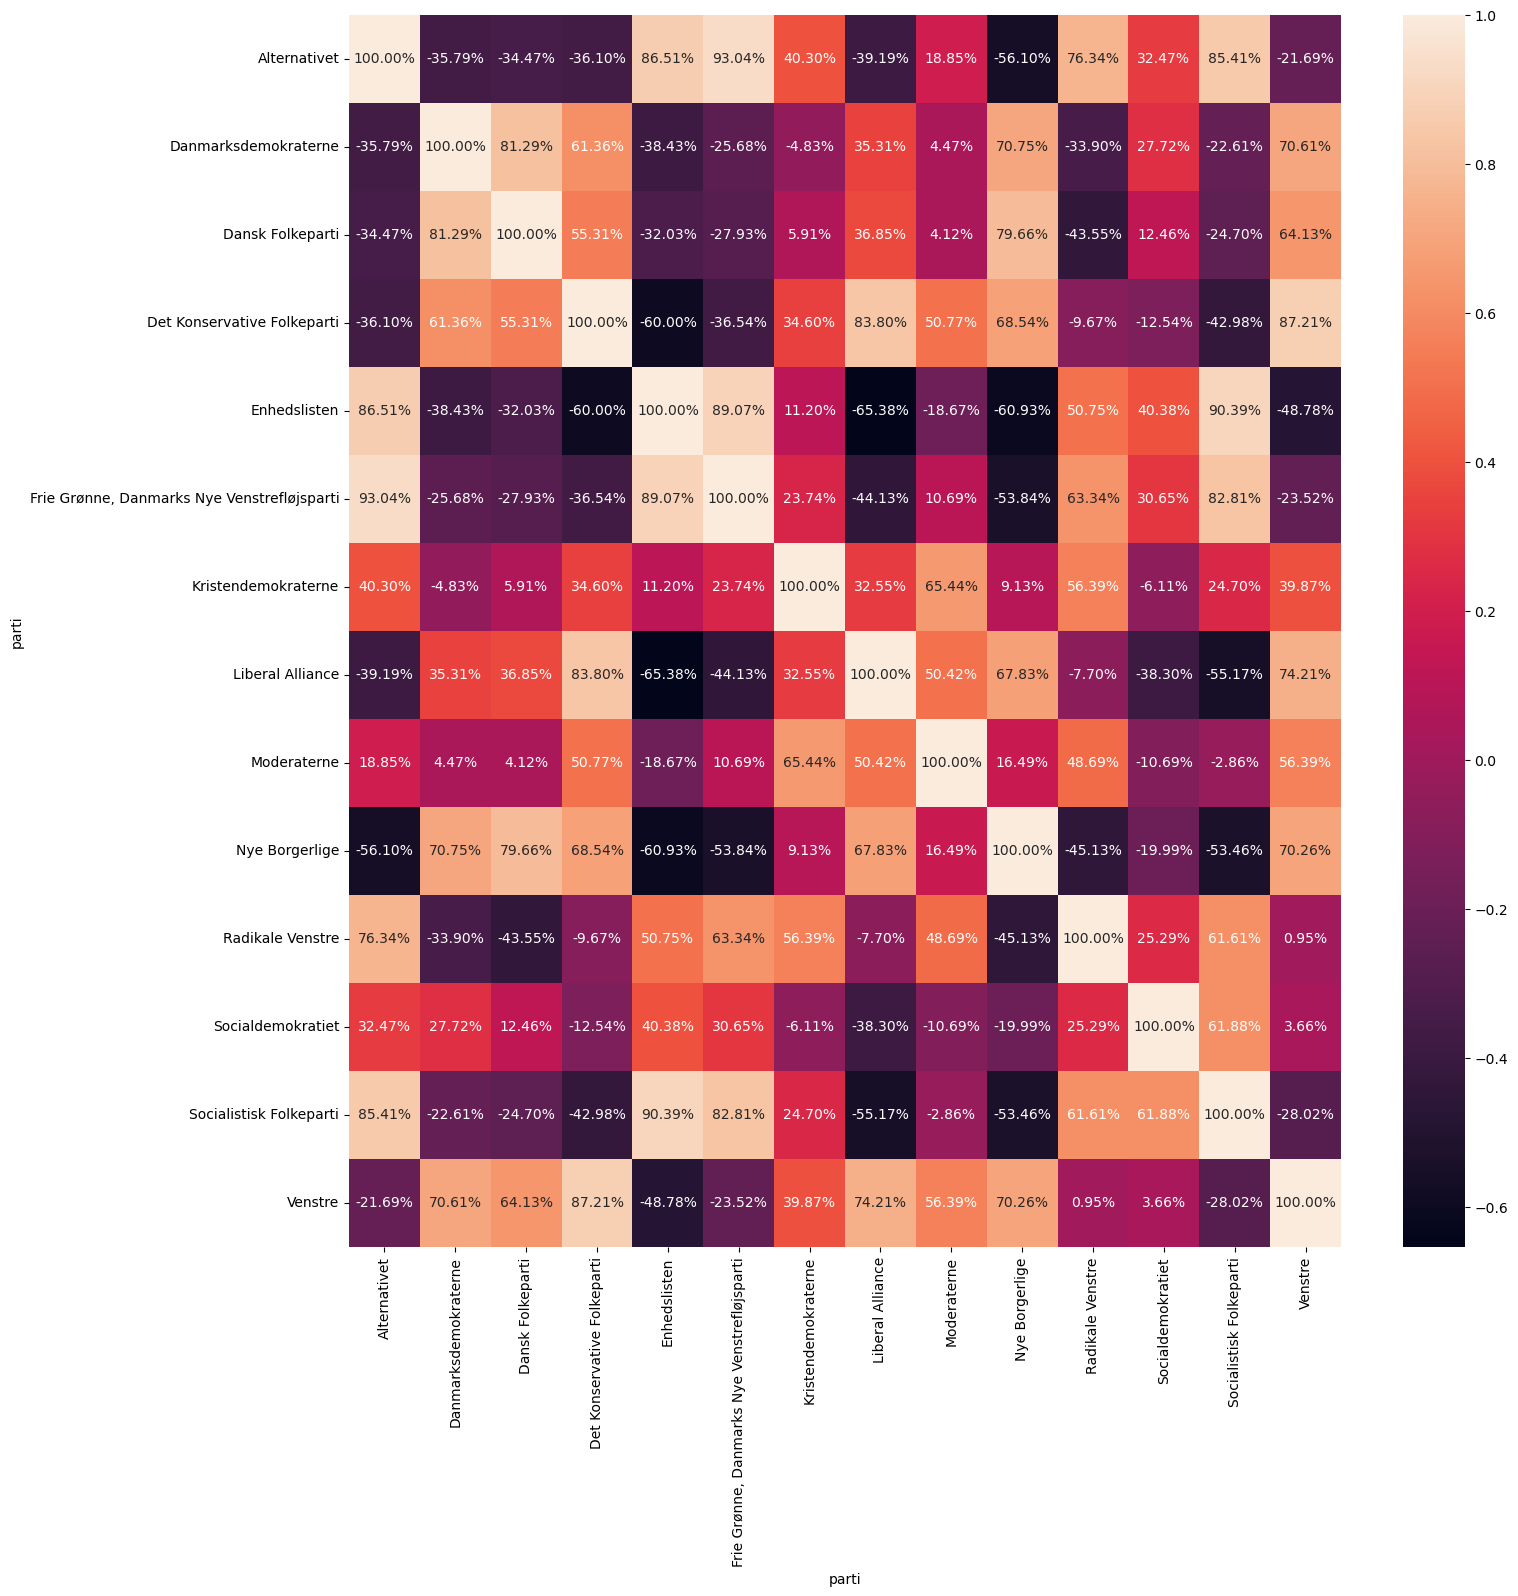

In [367]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_transposed.corr(), annot=True, fmt=".2%")
plt.show()

### Classification

### Using PCA data (scaled pca)

In [373]:
X_pca = allData_pca_df[["PC1", "PC2", "PC3"]]
y_pca = allData_pca_df["parti"]

In [374]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

In [375]:
def evaluate_model(model, predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")
    print()

In [376]:
# Decision Tree
dt_model_pca = DecisionTreeClassifier(random_state=42)
dt_model_pca.fit(X_train_pca, y_train_pca)
dt_predictions_pca = dt_model_pca.predict(X_test_pca)

print("Evaluate Decision Tree model")
evaluate_model(dt_model_pca, dt_predictions_pca, y_test_pca)

Evaluate Decision Tree model
Accuracy: 0.6184971098265896
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.64      0.47      0.54        15
                       Danmarksdemokraterne       0.45      0.83      0.59         6
                           Dansk Folkeparti       0.56      0.36      0.43        14
                Det Konservative Folkeparti       0.44      0.41      0.42        17
                               Enhedslisten       0.67      0.67      0.67        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.50      0.33      0.40         3
                        Kristendemokraterne       0.22      0.33      0.27         6
                           Liberal Alliance       0.94      0.83      0.88        18
                                Moderaterne       0.71      0.50      0.59        10
                             Nye Borgerlige       0.86      0.86    

In [379]:
# Random Forest
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_pca, y_train_pca)
rf_predictions_pca = rf_model_pca.predict(X_test_pca)

print("Evaluate Random Forest model")
evaluate_model(rf_model_pca, rf_predictions_pca, y_test_pca)

Evaluate Random Forest model
Accuracy: 0.6705202312138728
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.80      0.53      0.64        15
                       Danmarksdemokraterne       0.38      0.83      0.53         6
                           Dansk Folkeparti       0.83      0.36      0.50        14
                Det Konservative Folkeparti       0.59      0.59      0.59        17
                               Enhedslisten       0.62      0.67      0.64        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.33      0.33      0.33         3
                        Kristendemokraterne       0.20      0.33      0.25         6
                           Liberal Alliance       0.94      0.83      0.88        18
                                Moderaterne       0.70      0.70      0.70        10
                             Nye Borgerlige       0.87      0.93    

In [380]:
# Gradient Boosted Tree
gb_model_pca = GradientBoostingClassifier(random_state=42)
gb_model_pca.fit(X_train_pca, y_train_pca)
gb_predictions_pca = gb_model_pca.predict(X_test_pca)

print("Evaluate Gradient Boosted Tree model")
evaluate_model(gb_model_pca, gb_predictions_pca, y_test_pca)

Evaluate Gradient Boosted Tree model
Accuracy: 0.6416184971098265
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.73      0.53      0.62        15
                       Danmarksdemokraterne       0.38      0.83      0.53         6
                           Dansk Folkeparti       0.71      0.36      0.48        14
                Det Konservative Folkeparti       0.55      0.65      0.59        17
                               Enhedslisten       0.50      0.67      0.57        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.50      0.33      0.40         3
                        Kristendemokraterne       0.20      0.17      0.18         6
                           Liberal Alliance       1.00      0.89      0.94        18
                                Moderaterne       0.33      0.30      0.32        10
                             Nye Borgerlige       0.92      

### Original data

In [381]:
X = allData.drop(columns=["storkreds", "alder", "greater_than_40", "navn", "parti"])
y = allData["parti"]

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [383]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Evaluate Decision Tree model")
evaluate_model(dt_model, dt_predictions, y_test)

Evaluate Decision Tree model
Accuracy: 0.7572254335260116
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.67      0.53      0.59        15
                       Danmarksdemokraterne       0.86      1.00      0.92         6
                           Dansk Folkeparti       0.92      0.79      0.85        14
                Det Konservative Folkeparti       0.58      0.82      0.68        17
                               Enhedslisten       0.91      0.83      0.87        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      0.67      0.80         3
                        Kristendemokraterne       0.25      0.17      0.20         6
                           Liberal Alliance       0.86      0.67      0.75        18
                                Moderaterne       0.75      0.90      0.82        10
                             Nye Borgerlige       0.80      0.86    

In [384]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Evaluate Random Forest model")
evaluate_model(rf_model, rf_predictions, y_test)

Evaluate Random Forest model
Accuracy: 0.930635838150289
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       0.91      0.67      0.77        15
                       Danmarksdemokraterne       1.00      1.00      1.00         6
                           Dansk Folkeparti       1.00      0.93      0.96        14
                Det Konservative Folkeparti       0.94      0.94      0.94        17
                               Enhedslisten       0.91      0.83      0.87        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       1.00      1.00      1.00         3
                        Kristendemokraterne       1.00      0.83      0.91         6
                           Liberal Alliance       1.00      1.00      1.00        18
                                Moderaterne       0.83      1.00      0.91        10
                             Nye Borgerlige       0.93      0.93     

In [385]:
# Gradient Boosted Tree
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

print("Evaluate Gradient Boosted Tree model")
evaluate_model(gb_model, gb_predictions, y_test)

Evaluate Gradient Boosted Tree model
Accuracy: 0.9132947976878613
Classification Report:
                                             precision    recall  f1-score   support

                               Alternativet       1.00      0.67      0.80        15
                       Danmarksdemokraterne       1.00      1.00      1.00         6
                           Dansk Folkeparti       1.00      0.86      0.92        14
                Det Konservative Folkeparti       0.94      1.00      0.97        17
                               Enhedslisten       0.85      0.92      0.88        12
Frie Grønne, Danmarks Nye Venstrefløjsparti       0.67      0.67      0.67         3
                        Kristendemokraterne       0.80      0.67      0.73         6
                           Liberal Alliance       0.94      0.94      0.94        18
                                Moderaterne       0.91      1.00      0.95        10
                             Nye Borgerlige       0.93      

In [386]:
# Best results by rf model on original data

pred_and_true = pd.DataFrame(index = y_test.index)
pred_and_true["name"] = allData.loc[y_test.index]["navn"]
pred_and_true["original_party"] = allData.loc[y_test.index]["parti"]
pred_and_true["pred_party"] = rf_predictions

In [387]:
pred_and_true[pred_and_true["original_party"] != pred_and_true["pred_party"]]

,name,original_party,pred_party
393,Hanne Ringgaard Møller,Radikale Venstre,Moderaterne
716,Emil Ulrik Andersen,Enhedslisten,Alternativet
377,Lars Sternkopf Lillebæk,Nye Borgerlige,Det Konservative Folkeparti
601,Jakob Schmidt,Alternativet,Radikale Venstre
332,Ole Dupont Kofod,Alternativet,Radikale Venstre
650,Finn Andersen,Kristendemokraterne,Socialdemokratiet
760,Niels Martin Viuff,Det Konservative Folkeparti,Venstre
331,Henrik Boye,Alternativet,Enhedslisten
784,Irina Bjørnø,Alternativet,Moderaterne
118,Mette Kaasfeldt Bram,Alternativet,Radikale Venstre


- These are the politicians who are probably in wong party (according to RF model)

### Clustering

### Using PCA data

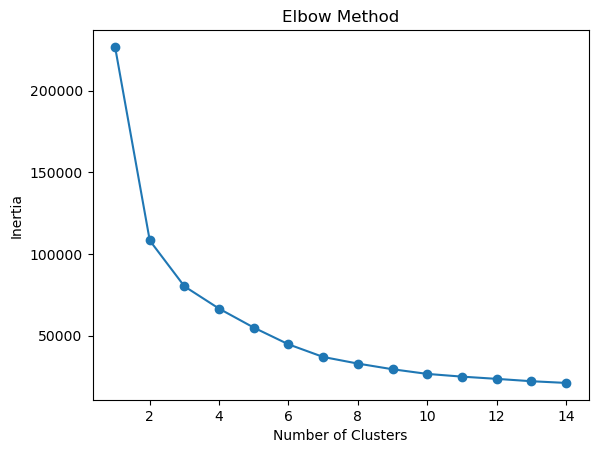

In [390]:
inertia = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Counter({0: 534, 1: 330})


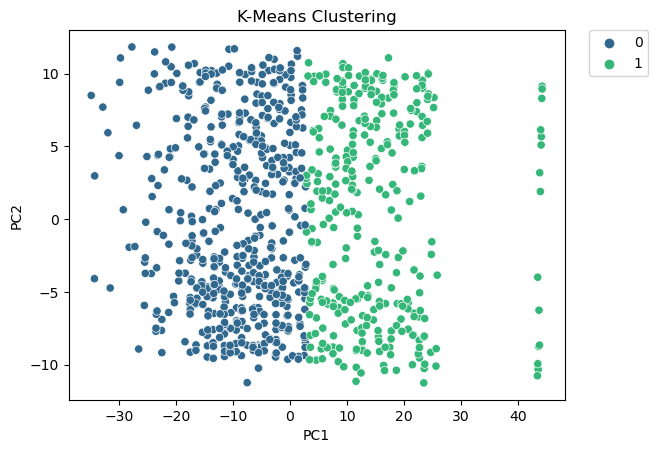

In [406]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the k-means algorithm to your data
kmeans_cluster = kmeans.fit_predict(X_pca)

print(collections.Counter(kmeans_cluster))

# Plot using seaborn
sns.scatterplot(x='PC1', y='PC2', hue=kmeans_cluster, data=X_pca, palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

Counter({13: 101, 7: 96, 5: 88, 6: 88, 1: 74, 0: 64, 3: 60, 8: 56, 9: 53, 11: 49, 2: 42, 10: 42, 4: 35, 12: 16})


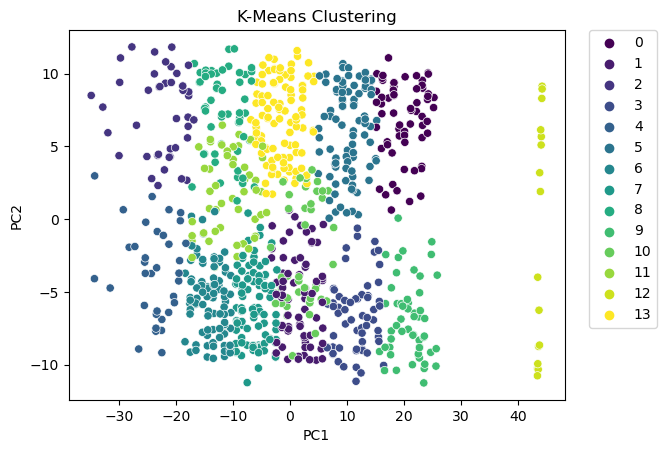

In [396]:
kmeans = KMeans(n_clusters=14, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the k-means algorithm to your data
kmeans_cluster = kmeans.fit_predict(X_pca)

print(collections.Counter(kmeans_cluster))

# Plot using seaborn
sns.scatterplot(x='PC1', y='PC2', hue=kmeans_cluster, data=X_pca, palette='viridis', legend='full')
plt.title('K-Means Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

## DBSCAN

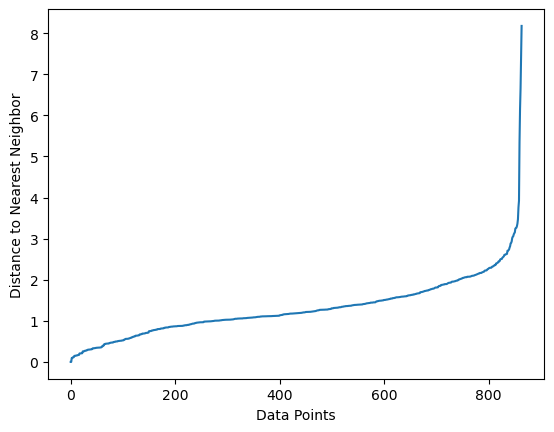

In [407]:
neigh = NearestNeighbors(n_neighbors=2)
distances, indices = neigh.fit(X_pca).kneighbors(X_pca)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('Distance to Nearest Neighbor')
plt.show()

In [414]:
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_pca)

print(collections.Counter(dbscan_clusters))



Counter({0: 759, -1: 99, 1: 6})


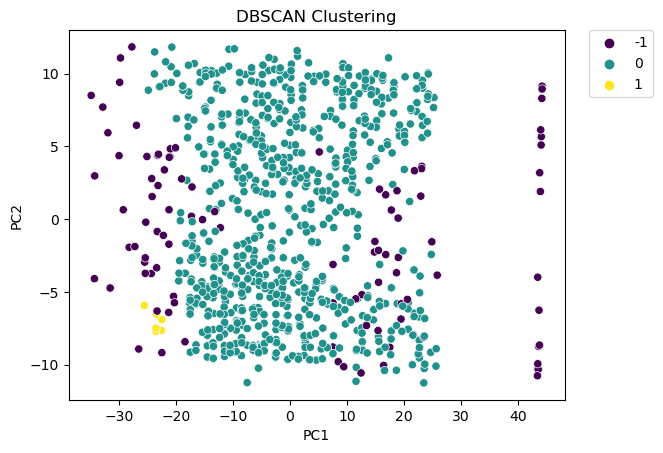

In [415]:
# Plot using seaborn
sns.scatterplot(x='PC1', y='PC2', hue=dbscan_clusters, data=X_pca, palette='viridis', legend='full')
plt.title('DBSCAN Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

This shows that PC1 v PC2 do not distictly classify the candidates , maybe the other dimension would be better


### Heirarchical clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
dendogramX = X.T
dendogramX

,0,1,2,3,4,5,6,7,8,9,...,854,855,856,857,858,859,860,861,862,863
530,-1,2,2,2,2,1,-1,1,2,2,...,2,2,1,1,1,1,1,1,1,1
531,-2,2,1,1,1,2,2,1,2,1,...,-2,-1,1,1,1,1,-2,1,-1,1
533,1,-1,-2,-2,-2,-1,-2,-2,-2,-1,...,-2,-1,-1,2,1,1,-2,1,1,-1
534,-2,-2,-2,-1,-2,-2,-2,-2,-1,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
535,2,-1,1,1,-1,1,-2,1,-1,-1,...,2,-1,2,2,2,2,1,2,1,1
537,1,-2,-2,1,-1,1,-2,-2,-2,-2,...,-1,-1,-1,-1,-1,-1,-2,-1,-1,-1
538,-2,1,1,1,-1,-2,-1,-2,-1,-1,...,1,1,1,1,1,1,-1,1,-1,1
540,1,-2,-1,1,1,1,-1,-1,2,-1,...,1,1,-1,-1,-1,-2,-2,-1,-1,-1
541,1,2,1,1,1,1,1,1,2,1,...,-1,-1,-1,-1,-1,1,-2,-1,-1,1
543,2,-2,-1,-2,-1,-1,-1,-2,-1,-1,...,-1,-1,1,1,1,1,-2,1,1,-1


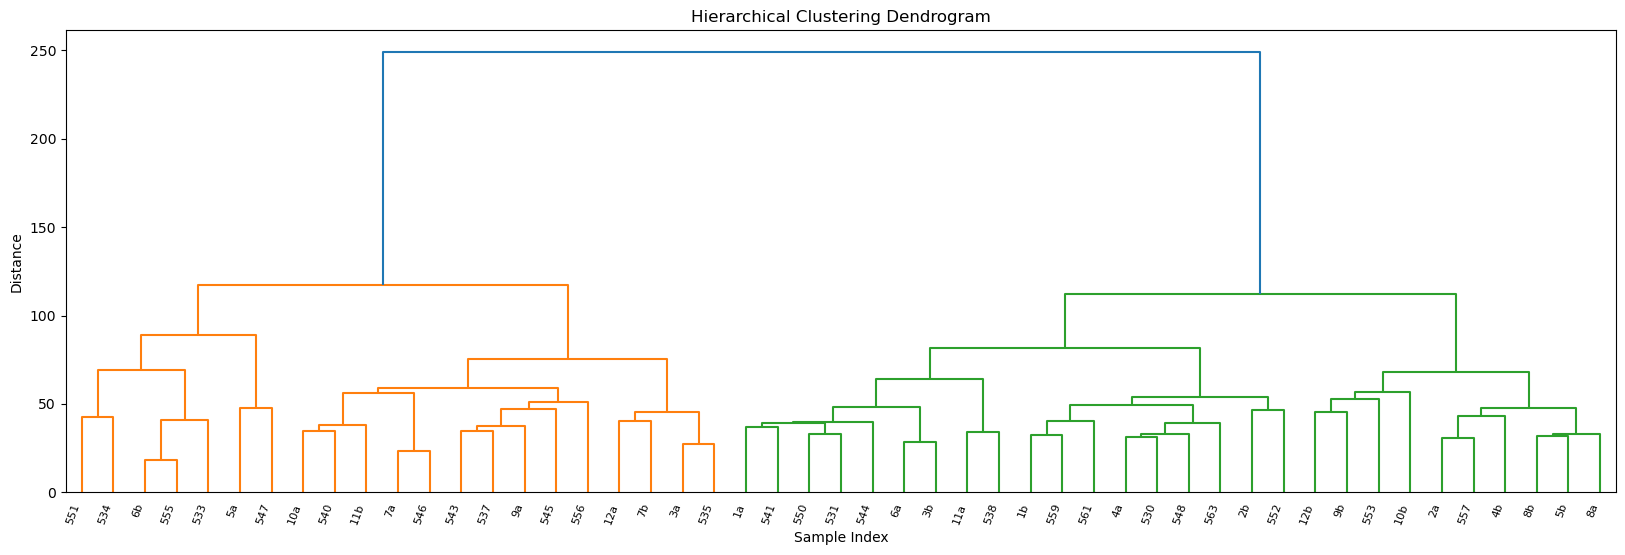

In [ ]:
# Perform hierarchical clustering
# 'ward' is just one method for linkage, you can choose others based on your needs
linkage_matrix = linkage(dendogramX, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 6))
dendrogram(linkage_matrix, labels=dendogramX.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.xticks(rotation=70, ha='right')

plt.show()